<a href="https://colab.research.google.com/github/mahi594/machine-learning/blob/main/machineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df= pd.read_csv('/content/student_data.csv')


In [ ]:
df.head()


,CGPA,IQ,Placement
0,6.87,142,1
1,9.75,131,1
2,8.66,83,0
3,7.99,102,0
4,5.78,94,0


In [ ]:
df.info   #1:> chech of want any preprocessing ::>>>to check any null values

<bound method DataFrame.info of     CGPA   IQ  Placement
0   6.87  142          1
1   9.75  131          1
2   8.66   83          0
3   7.99  102          0
4   5.78   94          0
..   ...  ...        ...
95  7.47  136          1
96  7.61  129          1
97  7.14  102          0
98  5.13  110          0
99  5.54  121          0

[100 rows x 3 columns]>

In [ ]:
#remove NULL values
df = df.dropna(how='all')        # drop rows where *all* elements are NULL
df = df.dropna(axis=1, how='all')  # drop columns where *all* elements are NULL


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CGPA       100 non-null    float64
 1   IQ         100 non-null    int64  
 2   Placement  100 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 2.5 KB


In [ ]:
#2:>EDA
import matplotlib.pyplot as plt      # plot the data

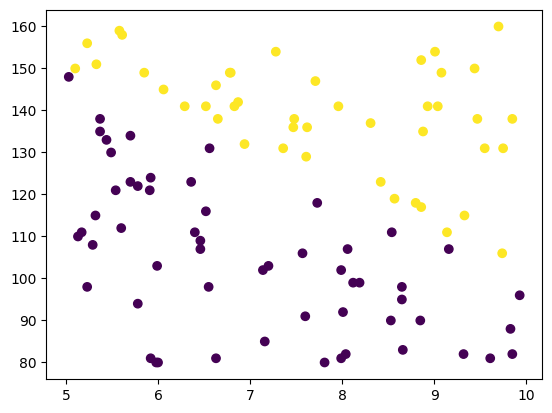

In [ ]:
plt.scatter(df['CGPA'],df['IQ'],c=df['Placement'])    #yellow got the placement

In [ ]:
#3:> extract input and ouput columns(input cols are:cgpa,iq anf these are called independent variables     output cl is : placement which is called dependent variable)
X=df.iloc[:,0:2 ]  #input
Y=df.iloc[:,-1]  #output()placement

In [ ]:
X

,CGPA,IQ
0,6.87,142
1,9.75,131
2,8.66,83
3,7.99,102
4,5.78,94
...,...,...
95,7.47,136
96,7.61,129
97,7.14,102
98,5.13,110


In [ ]:
Y

,Placement
0,1
1,1
2,0
3,0
4,0
...,...
95,1
96,1
97,0
98,0


In [ ]:
#4:> train test split
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1)

In [ ]:
X_train

,CGPA,IQ
6,5.29,108
53,9.47,138
43,9.55,131
64,6.40,111
78,6.79,149
...,...,...
79,5.58,159
77,5.37,138
89,7.36,131
42,5.17,111


In [ ]:
# 5:> scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() #object

In [ ]:
X_train= scaler.fit_transform(X_train)
#Y_train= scaler.fit_transform(Y_train) # Removed this line as target variable Y should not be scaled.

In [ ]:
X_train

array([[-1.38641701, -0.51997359],
       [ 1.45685642,  0.77396991],
       [ 1.51127314,  0.47204976],
       [-0.63138507, -0.39057924],
       [-0.36610357,  1.24841586],
       [ 0.74263702,  0.12699816],
       [-0.91027074, -0.73563084],
       [ 0.16445941, -0.60623649],
       [-0.37290566,  1.24841586],
       [ 1.76975254, -1.03755099],
       [ 0.27329284, -0.08865909],
       [ 0.66781403,  0.73083846],
       [ 1.03512687, -1.29633969],
       [ 0.89908508, -1.08068244],
       [-0.31168686,  0.94649571],
       [ 0.53857433, -0.90815664],
       [-0.03280119,  1.46407311],
       [-0.54975999,  0.90336426],
       [-1.49525044, -0.43371069],
       [-0.91707283, -1.72765419],
       [-0.95788536,  0.17012961],
       [-0.96468745,  0.04073526],
       [-1.10753133,  0.12699816],
       [-1.51565671,  1.29154731],
       [-0.70620805,  0.90336426],
       [ 0.19846986,  0.68770701],
       [ 1.05553314,  0.64457556],
       [-1.56327133,  1.20528441],
       [ 0.89908508,

In [ ]:
X_test= scaler.transform(X_test)

In [ ]:
X_test

array([[  8.85,  90.  ],
       [  9.83,  88.  ],
       [  9.61,  81.  ],
       [  8.57, 119.  ],
       [  7.81,  80.  ],
       [  7.6 ,  91.  ],
       [  5.03, 148.  ],
       [  7.36, 131.  ],
       [  8.86, 152.  ],
       [  5.17, 111.  ]])

In [ ]:
#6 :> model training
from sklearn.linear_model import LogisticRegression

In [ ]:
clf= LogisticRegression()

In [ ]:
#fit is used to train data
clf.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
#7 :> evaluate the model
y_pred=clf.predict(X_test)    #predicted data after training the model

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
Y_test  #actual answer of the data

,Placement
28,1
90,0
9,0
54,0
34,0
32,1
5,0
50,0
65,1
60,1


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(Y_test,y_pred)

0.4

In [ ]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

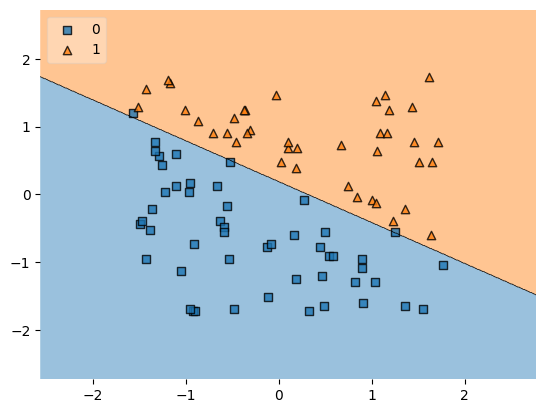

In [ ]:
plot_decision_regions(X_train,Y_train.values,clf=clf,legend=2)

In [ ]:
#8:> deploy model
import pickle

In [ ]:
pickle.dump(clf,open('model.pkl','wb'))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
!git clone https://github.com/mahi594/machine-learning.git


Cloning into 'machine-learning'...
fatal: could not read Username for 'https://github.com': No such device or address
